In [427]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [448]:
# Load dataset
df = pd.read_csv("updated_diet_planner_dataset4.csv")

In [449]:
df.head()


,Gender,Height,Weight,BMI Class,age,activity level,TDEE,target calories,recommended meals
0,Male,161,89,4,18,Lightly Active,2490.47,2090.47,Meal B
1,Male,179,127,4,21,Moderately Active,3547.56,3147.56,Meal D
2,Male,172,139,5,33,Sedentary,2766.00,2266.00,Meal B
3,Male,153,104,5,23,Lightly Active,2593.59,2093.59,Meal B
4,Male,165,68,2,39,Very Active,2624.16,2624.16,Meal C


In [450]:
# Convert categorical columns to numerical
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Example mapping
df['activity level'] = df['activity level'].map({
    'Sedentary': 1,
    'Lightly Active': 2,
    'Moderately Active': 3,
    'Very Active': 4
})


,Gender,Height,Weight,BMI Class,age,activity level,TDEE,target calories,recommended meals
0,0,161,89,4,18,2,2490.47,2090.47,Meal B
1,0,179,127,4,21,3,3547.56,3147.56,Meal D
2,0,172,139,5,33,1,2766.00,2266.00,Meal B
3,0,153,104,5,23,2,2593.59,2093.59,Meal B
4,0,165,68,2,39,4,2624.16,2624.16,Meal C
...,...,...,...,...,...,...,...,...,...
395,0,166,160,5,44,1,2907.00,2407.00,Meal B
396,0,145,130,5,57,3,2985.69,2485.69,Meal B
397,0,178,138,5,32,1,2805.00,2305.00,Meal B
398,0,168,158,5,18,2,3499.38,2999.38,Meal C


In [451]:
df.sample(10)

,Gender,Height,Weight,BMI Class,age,activity level,TDEE,target calories,recommended meals
75,1,185,119,4,29,2,2805.34,2405.34,Meal B
125,1,184,152,5,23,1,2872.80,2372.80,Meal B
229,0,151,154,5,51,3,3462.31,2962.31,Meal C
204,1,190,156,5,19,4,4297.84,3797.84,Meal D
80,1,167,58,2,37,2,1756.91,1756.91,Meal A
351,0,196,116,4,34,1,2664.00,2264.00,Meal B
18,1,146,104,5,36,2,2215.81,1715.81,Meal A
111,1,176,156,5,42,1,2746.80,2246.80,Meal B
232,1,189,132,4,35,4,3735.06,3335.06,Meal D
254,1,146,101,5,26,3,2528.83,2028.83,Meal B


In [452]:
# Ensure that 'recommended meals' column contains valid categorical values
meal_mapping = {
    "Meal A": 0,
    "Meal B": 1,
    "Meal C": 2,
    "Meal D": 3,
}

# If the meals are still strings, you can map them directly to integers as shown here:
df['recommended meals'] = df['recommended meals'].map(meal_mapping)

# Now 'recommended meals' is encoded as 0, 1, or 2
print("Unique values in 'recommended meals' after encoding:")
print(df['recommended meals'].unique())

Unique values in 'recommended meals' after encoding:
[1 3 2 0]


In [453]:
df

,Gender,Height,Weight,BMI Class,age,activity level,TDEE,target calories,recommended meals
0,0,161,89,4,18,2,2490.47,2090.47,1
1,0,179,127,4,21,3,3547.56,3147.56,3
2,0,172,139,5,33,1,2766.00,2266.00,1
3,0,153,104,5,23,2,2593.59,2093.59,1
4,0,165,68,2,39,4,2624.16,2624.16,2
...,...,...,...,...,...,...,...,...,...
395,0,166,160,5,44,1,2907.00,2407.00,1
396,0,145,130,5,57,3,2985.69,2485.69,1
397,0,178,138,5,32,1,2805.00,2305.00,1
398,0,168,158,5,18,2,3499.38,2999.38,2


In [454]:
# Features and Target
X = df.drop(['recommended meals'], axis=1)
y = df['recommended meals']

In [455]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [456]:
X_train

,Gender,Height,Weight,BMI Class,age,activity level,TDEE,target calories
3,0,153,104,5,23,2,2593.59,2093.59
18,1,146,104,5,36,2,2215.81,1715.81
202,1,180,156,5,34,4,4060.65,3560.65
250,0,183,147,5,22,3,3888.56,3388.56
274,1,156,52,2,27,1,1438.80,1438.80
...,...,...,...,...,...,...,...,...
71,0,168,160,5,27,3,3906.00,3406.00
106,1,171,120,5,18,2,2774.41,2274.41
270,0,187,62,1,29,2,2267.03,2567.03
348,1,155,115,5,34,4,3083.87,2583.87


In [457]:
y_train

3      1
18     0
202    3
250    3
274    0
      ..
71     3
106    1
270    2
348    2
102    1
Name: recommended meals, Length: 320, dtype: int64

In [436]:
# Scale Numerical Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

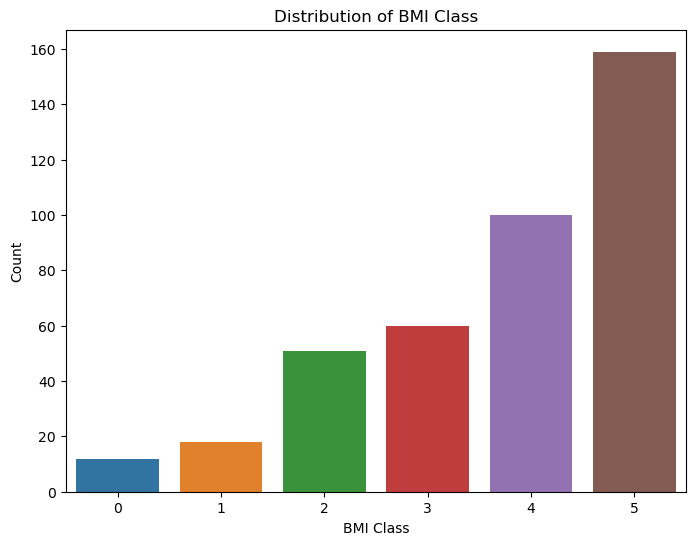

In [458]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of BMI Class
plt.figure(figsize=(8, 6))
sns.countplot(x='BMI Class', data=df)
plt.title('Distribution of BMI Class')
plt.xlabel('BMI Class')
plt.ylabel('Count')
plt.show()


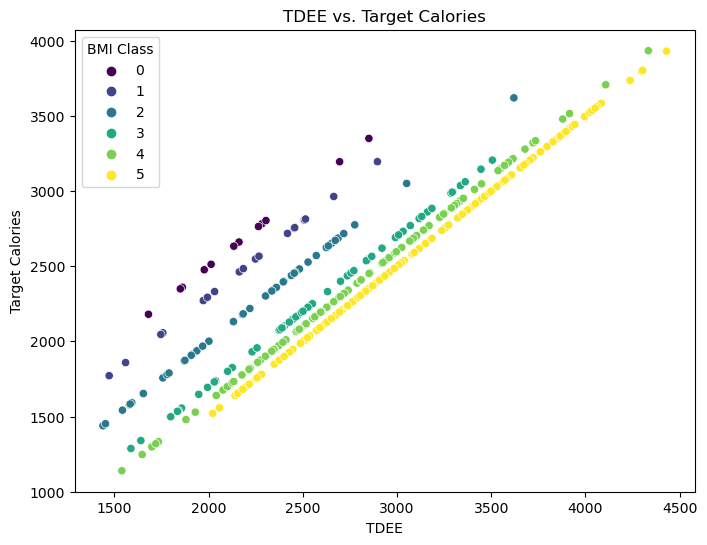

In [459]:
# Plotting TDEE vs. Target Calories
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TDEE', y='target calories', hue='BMI Class', data=df, palette="viridis")
plt.title('TDEE vs. Target Calories')
plt.xlabel('TDEE')
plt.ylabel('Target Calories')
plt.show()


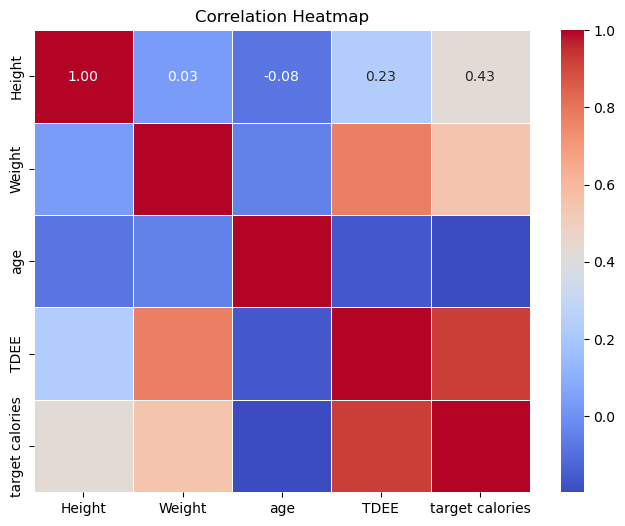

In [460]:
# Plotting correlation heatmap
corr_matrix = df[['Height', 'Weight', 'age', 'TDEE', 'target calories']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


c:\Users\Abdelrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

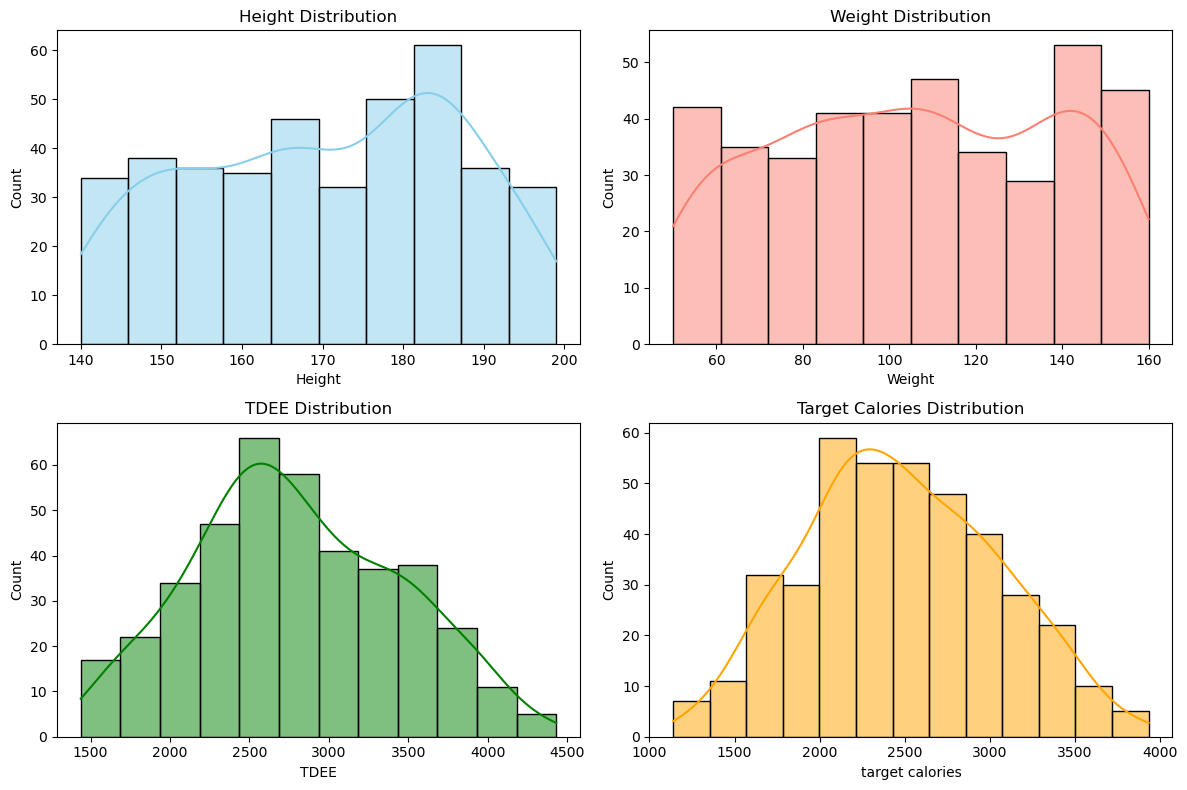

In [461]:
# Plotting the distribution of Height, Weight, TDEE, and Target Calories
plt.figure(figsize=(12, 8))

# Height distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Height'], kde=True, color='skyblue')
plt.title('Height Distribution')

# Weight distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Weight'], kde=True, color='salmon')
plt.title('Weight Distribution')

# TDEE distribution
plt.subplot(2, 2, 3)
sns.histplot(df['TDEE'], kde=True, color='green')
plt.title('TDEE Distribution')

# Target Calories distribution
plt.subplot(2, 2, 4)
sns.histplot(df['target calories'], kde=True, color='orange')
plt.title('Target Calories Distribution')

plt.tight_layout()
plt.show()


In [465]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [462]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1500, penalty='l1', solver='saga', C=1.0,multi_class='ovr'),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=4),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=4)
}


In [466]:
# Train and Evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 50)

Training Logistic Regression...


c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.6250
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.65      0.43      0.52        35
           2       0.55      0.55      0.55        20
           3       0.68      1.00      0.81        13

    accuracy                           0.62        80
   macro avg       0.62      0.72      0.65        80
weighted avg       0.63      0.62      0.61        80

Confusion Matrix:
 [[11  1  0  0]
 [ 7 15  9  4]
 [ 0  7 11  2]
 [ 0  0  0 13]]
--------------------------------------------------
Training Random Forest...
Accuracy: 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.99        35
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        13

    accuracy                           0.99        80


c:\Users\Abdelrahman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


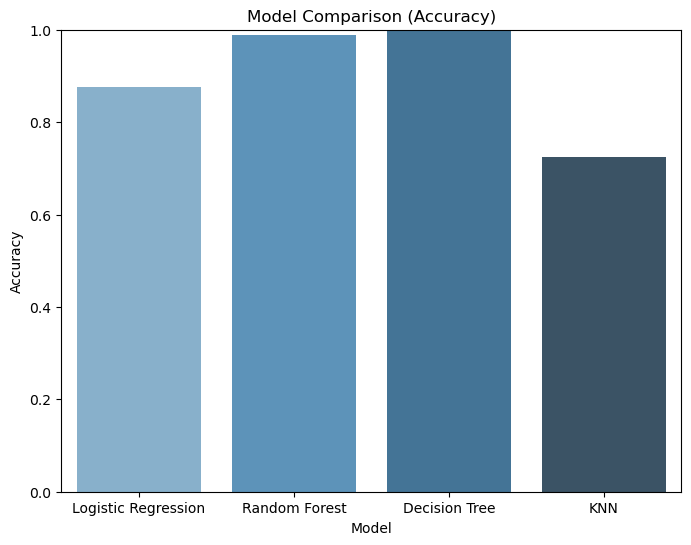

In [443]:
# Accuracy of models (assuming you have the accuracy scores stored)
models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'KNN']
accuracies = [0.8750, 0.9875,1.0000, 0.7250]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette="Blues_d")
plt.title('Model Comparison (Accuracy)')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [444]:
print(df['recommended meals'].value_counts())


recommended meals
2    177
1    133
0     90
Name: count, dtype: int64


In [418]:
# Add some noise to the data (random noise within a small range)
noise = np.random.normal(0, 0.1, X_train.shape)
X_train_noisy = X_train + noise

DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(X_train_noisy,y_train)

DecisionTreeClassifier(random_state=42)

In [468]:
RFC = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=10, min_samples_split=5, min_samples_leaf=4)
RFC.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [ ]:
LR = LogisticRegression(max_iter=1500, penalty='l1', solver='saga', C=1.0,multi_class='ovr')
LR.fit(X_train_noisy,y_train)

In [469]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RFC, X_train, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.96875  1.       0.9375   0.96875  0.984375]
Average cross-validation score: 0.971875


In [472]:
# Mapping numerical predictions to meal categories
meal_mapping = {
    0: "Meal A",  # Low Calorie
    1: "Meal B",  # Medium Calorie
    2: "Meal C",  # High Calorie
    3: "Meal D",  # Any other category if needed
}

# Function to take user input
def get_user_input():
    print("Enter the following details to predict the recommended meal plan:")
    gender = int(input("Gender (0 for Male, 1 for Female): "))
    height = int(input("Height (in cm): "))
    weight = int(input("Weight (in kg): "))
    bmi_class = int(input("BMI Class (0: Extremely Weak, 1: Weak, 2: Normal, 3: Overweight, 4: Obesity, 5: Extremely Obesity): "))
    age = int(input("Age (in years): "))
    activity_level = int(input("Activity Level (1: Sedentary, 2: Lightly Active, 3: Moderately Active, 4: Very Active): "))
    bmr = float(input("Enter BMR (from previous calculation): "))
    tdee = float(input("Enter TDEE (from previous calculation): "))

    # Adjust target calories based on BMI class
    if bmi_class == 0:  # Extremely Weak
        target_calories = tdee + 500
    elif bmi_class == 1:  # Weak
        target_calories = tdee + 300
    elif bmi_class == 2:  # Normal
        target_calories = tdee
    elif bmi_class == 3:  # Overweight
        target_calories = tdee - 300
    elif bmi_class == 4:  # Obesity
        target_calories = tdee - 400
    else:  # Extremely Obesity
        target_calories = tdee - 500

    print(f"\nTarget Calories (adjusted based on BMI Class): {target_calories:.2f}")

    # Return the input as a single sample
    return np.array([[gender, height, weight, bmi_class, age, activity_level, tdee, target_calories]])

# Get user input
user_input = get_user_input()

# Predict using the trained model
predicted_meal_category = RFC.predict(user_input)[0]  # Get the predicted label
predicted_meal_plan = meal_mapping[predicted_meal_category]  # Map label to category

print(f"\nRecommended Meal Plan: {predicted_meal_plan}")


Enter the following details to predict the recommended meal plan:

Target Calories (adjusted based on BMI Class): 2192.00

Recommended Meal Plan: Meal B


c:\Users\Abdelrahman\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [473]:
import joblib
# Save the model
joblib.dump(RFC, 'RFC_model_for_Meals.pkl')

print("Model saved successfully!")

Model saved successfully!
